In [99]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [100]:
#Loading training Dataset
data = pd.read_csv('C:/Users/Lenovo/Desktop/IPY/home/MachineLearningPython-HousePriceCompetition/Data/HousePricingTutorial.csv')

In [101]:
##The meaning of all the columns are...



##SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
##MSSubClass: The building class
##MSZoning: The general zoning classification
##LotFrontage: Linear feet of street connected to property
##LotArea: Lot size in square feet
##Street: Type of road access
##Alley: Type of alley access
##LotShape: General shape of property
##LandContour: Flatness of the property
##Utilities: Type of utilities available
##LotConfig: Lot configuration
##LandSlope: Slope of property
##Neighborhood: Physical locations within Ames city limits
##Condition1: Proximity to main road or railroad
##Condition2: Proximity to main road or railroad (if a second is present)
##BldgType: Type of dwelling
##HouseStyle: Style of dwelling
##OverallQual: Overall material and finish quality
##OverallCond: Overall condition rating
##YearBuilt: Original construction date
##YearRemodAdd: Remodel date
##RoofStyle: Type of roof
##RoofMatl: Roof material
##Exterior1st: Exterior covering on house
##Exterior2nd: Exterior covering on house (if more than one material)
##MasVnrType: Masonry veneer type
##MasVnrArea: Masonry veneer area in square feet
##ExterQual: Exterior material quality
##ExterCond: Present condition of the material on the exterior
##Foundation: Type of foundation
##BsmtQual: Height of the basement
##BsmtCond: General condition of the basement
##BsmtExposure: Walkout or garden level basement walls
##BsmtFinType1: Quality of basement finished area
##BsmtFinSF1: Type 1 finished square feet
##BsmtFinType2: Quality of second finished area (if present)
##BsmtFinSF2: Type 2 finished square feet
##BsmtUnfSF: Unfinished square feet of basement area
##TotalBsmtSF: Total square feet of basement area
##Heating: Type of heating
##HeatingQC: Heating quality and condition
##CentralAir: Central air conditioning
##Electrical: Electrical system
##1stFlrSF: First Floor square feet
##2ndFlrSF: Second floor square feet
##LowQualFinSF: Low quality finished square feet (all floors)
##GrLivArea: Above grade (ground) living area square feet
##BsmtFullBath: Basement full bathrooms
##BsmtHalfBath: Basement half bathrooms
##FullBath: Full bathrooms above grade
##HalfBath: Half baths above grade
##Bedroom: Number of bedrooms above basement level
##Kitchen: Number of kitchens
##KitchenQual: Kitchen quality
##TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
##Functional: Home functionality rating
##Fireplaces: Number of fireplaces
##FireplaceQu: Fireplace quality
##GarageType: Garage location
##GarageYrBlt: Year garage was built
##GarageFinish: Interior finish of the garage
##GarageCars: Size of garage in car capacity
##GarageArea: Size of garage in square feet
##GarageQual: Garage quality
##GarageCond: Garage condition
##PavedDrive: Paved driveway
##WoodDeckSF: Wood deck area in square feet
##OpenPorchSF: Open porch area in square feet
##EnclosedPorch: Enclosed porch area in square feet
##3SsnPorch: Three season porch area in square feet
##ScreenPorch: Screen porch area in square feet
##PoolArea: Pool area in square feet
##PoolQC: Pool quality
##Fence: Fence quality
##MiscFeature: Miscellaneous feature not covered in other categories
##MiscVal: $Value of miscellaneous feature
##MoSold: Month Sold
##YrSold: Year Sold
##SaleType: Type of sale
##SaleCondition: Condition of sale

In [102]:
#Shape of the data
print(data.shape)

(1460, 81)


Skew is: 0.12134661989685333


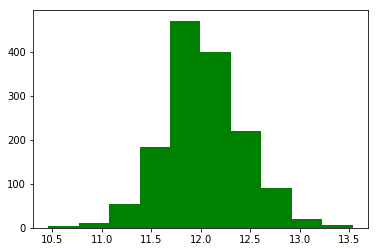

In [103]:
data['SalePrice'] = np.log1p(data['SalePrice'])

target = data['SalePrice']
print ("Skew is:", target.skew())
plt.hist(target, color='green')
plt.show()

In [104]:
#Finding all the Numerical columns
numeric_features = data.select_dtypes(include=[np.number])

In [105]:
#Finding the first five features that are most positively correlated with SalePrice
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')

SalePrice      1.000000
OverallQual    0.817185
GrLivArea      0.700927
GarageCars     0.680625
GarageArea     0.650888
Name: SalePrice, dtype: float64 



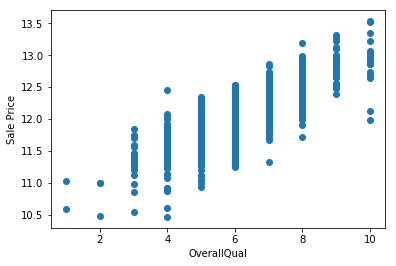

In [106]:
#print(data['OverallQual'].unique())


plt.scatter(x=data['OverallQual'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('OverallQual')
plt.show()

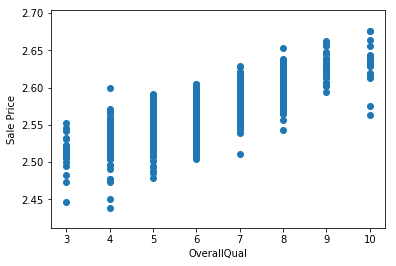

In [107]:
#REMOVING OUTLINER
data = data[data['OverallQual']>2]


plt.scatter(x=data['OverallQual'], y=np.log1p(data.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('OverallQual')
plt.show()

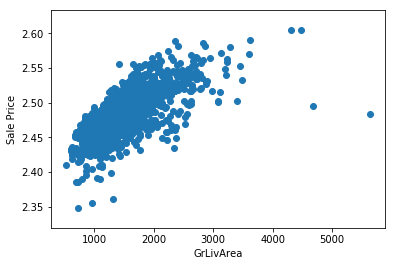

In [108]:
#print(data['GrLivArea'].unique())


plt.scatter(x=data['GrLivArea'], y=np.log(data.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('GrLivArea')
plt.show()

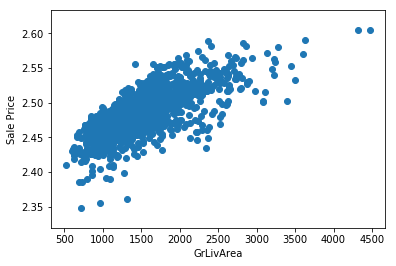

In [109]:
#REMOVING OUTLINER
data = data[data['GrLivArea'] < 4500]


plt.scatter(x=data['GrLivArea'],  y=np.log(data.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('GrLivArea')
plt.show()

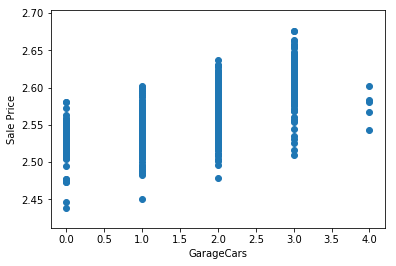

In [110]:
#print(data['GarageCars'].unique())


plt.scatter(x=data['GarageCars'], y=np.log1p(data.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('GarageCars')
plt.show()

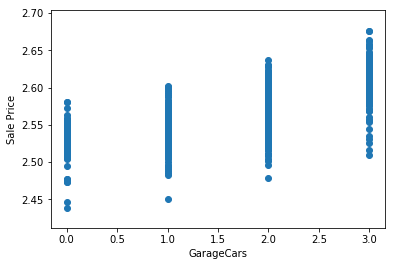

In [111]:
#REMOVING OUTLINER
data = data[data['GarageCars'] < 3.5]


plt.scatter(x=data['GarageCars'],  y=np.log1p(data.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('GarageCars')
plt.show()

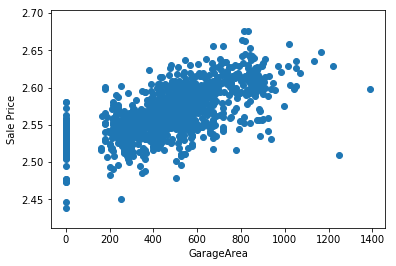

In [112]:
#print(data['GarageArea'].unique())


plt.scatter(x=data['GarageArea'], y=np.log1p(data.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('GarageArea')
plt.show()

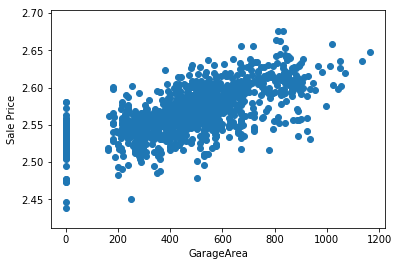

In [113]:
#REMOVING OUTLINER
data = data[data['GarageArea'] < 1200]


plt.scatter(x=data['GarageArea'],  y=np.log1p(data.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('GarageArea')
plt.show()

In [114]:
data.shape

(1445, 81)

In [115]:
#Understanding NULL values and sorting them !
Isnull=data.isnull().sum()
Isnull.sort_values(inplace=True, ascending=False)
print(Isnull)

PoolQC           1439
MiscFeature      1392
Alley            1355
Fence            1165
FireplaceQu       682
LotFrontage       257
GarageCond         78
GarageType         78
GarageYrBlt        78
GarageFinish       78
GarageQual         78
BsmtExposure       37
BsmtFinType2       37
BsmtFinType1       36
BsmtCond           36
BsmtQual           36
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [116]:
#Examining the NULL values and filling with appropriate values:
#There are 19 columns with NULLs.

# PoolQC           1453
# MiscFeature      1406
# Alley            1369
# Fence            1179
# FireplaceQu       690
# LotFrontage       259
# GarageCond         81
# GarageType         81
# GarageYrBlt        81
# GarageFinish       81
# GarageQual         81
# BsmtExposure       38
# BsmtFinType2       38
# BsmtFinType1       37
# BsmtCond           37
# BsmtQual           37
# MasVnrArea          8
# MasVnrType          8
# Electrical          1


data['PoolQC'] = data['PoolQC'].fillna('None')
data['MiscFeature'] = data['MiscFeature'].fillna('None')
data['Alley'] = data['Alley'].fillna('None')
data['Fence'] = data['Fence'].fillna('None')
data['FireplaceQu'] = data['FireplaceQu'].fillna('None')
data['GarageType'] = data['GarageType'].fillna('None')
data['GarageFinish'] = data['GarageFinish'].fillna('None')
data['GarageCond'] = data['GarageCond'].fillna('None')
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('None')
data['BsmtExposure'] = data['BsmtExposure'].fillna('None')
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('None')
data['BsmtCond'] = data['BsmtCond'].fillna('None')
data['BsmtQual'] = data['BsmtQual'].fillna('None')
data['GarageQual'] = data['GarageQual'].fillna('None')
data['MasVnrType'] = data['MasVnrType'].fillna('None')



In [117]:
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(int(0))
data['GarageArea'] = data['GarageArea'].fillna(int(0))
data['GarageCars'] = data['GarageCars'].fillna(int(0))
data['MasVnrArea'] = data['MasVnrArea'].fillna(int(0))


In [118]:
#########################################################################################################

In [119]:
#Can Experiment-
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
#train['LotFrontage'] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [120]:
#Can Experiment-
#train['Electrical'] = train['Electrical'].fillna(train['Electrical']).mode()[0]

In [121]:
data['LotFrontage'] = data['LotFrontage'].fillna(int(0))
data['Electrical'] = data['Electrical'].fillna(int (0))


In [122]:
#########################################################################################################

In [123]:
#The total number of columns = 81
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [124]:
#Total columns in data:
print(len(data.columns))


81


In [125]:
#Numerical Columns in data = 38
print(len(data.select_dtypes(include=[np.number]).columns.tolist()))

38


In [126]:
#Non-Numerical Columns in data = 43
print(len(data.select_dtypes(exclude=[np.number]).columns.tolist()))

43


In [127]:
#data = 43+38 = 81

In [128]:
nonNumColumns = data.select_dtypes(exclude=[np.number]).columns.tolist();

In [129]:
#Converting  Dataframe  ---> Numerical + NonNumerical + Sparse
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

for column in nonNumColumns:
    data = create_dummies(data,column)

In [130]:
#Before split- checking the shape:
data.shape

(1445, 346)

In [131]:
train= data.tail(1435)
test=data.head(10)

In [132]:
#CO-RELATION BETWEEN NUMERICS IS FOUND
#NULL FILLED
#NON-NUMERIC IS CONVERTED
#TRAIN-TEST IS DIVIDED
#TIME TO APPLY MODEL

In [133]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [134]:
model = linear_model.LinearRegression()

In [135]:
#I picked up quality + Co-realation variables.
selectdColumns =  ['OverallQual','OverallCond','ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Ex','ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA','BsmtQual_TA','BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_None', 'BsmtQual_TA','BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_None', 'BsmtCond_Po', 'BsmtCond_TA','BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_None', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf','BsmtFinType2_ALQ', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_None', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'HeatingQC_Ex', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA','LowQualFinSF',
                 'KitchenQual_Ex', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA','FireplaceQu_Ex', 'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_None', 'FireplaceQu_Po', 'FireplaceQu_TA','GarageQual_Ex', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_None', 'GarageQual_Po', 'GarageQual_TA','GarageCond_Ex', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_None', 'GarageCond_Po', 'GarageCond_TA', 'PoolQC_Ex', 'PoolQC_Fa', 'PoolQC_Gd', 'PoolQC_None', 'Fence_GdPrv', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw', 'Fence_None','MiscFeature_Gar2', 'MiscFeature_None', 'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC','MoSold','YrSold','SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD','SaleCondition_Abnorml', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial',
                 'OverallQual','GrLivArea','GarageCars','GarageArea']

In [136]:
model.fit(train[selectdColumns], train["SalePrice"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [137]:
all_X = train[selectdColumns]
all_y = train['SalePrice']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.20,random_state=0)

model.fit(train_X, train_y)
predictions = model.predict(test_X)
print(predictions)

[12.25900688 12.65908546 11.43104308 11.97150844 11.28207814 11.53570816
 12.14456044 11.8238804  11.75972653 11.67479239 11.99092915 11.79991037
 11.86384792 12.01394431 11.95632339 11.73040131 11.97659869 11.70859337
 12.50427677 12.21696592 11.94973788 11.66504552 11.89393298 12.16653702
 12.87759823 12.67122959 11.84915076 11.99645993 12.11963181 11.92336996
 12.80097616 12.50154278 11.84374134 12.20720848 12.49763653 11.42543832
 12.22741912 11.82709969 12.08060778 12.62609868 12.60752275 12.06835414
 12.27451227 12.3277471  11.74437138 11.94854215 11.52070516 11.88956836
 11.8114868  12.48234451 12.18338959 11.87419309 12.37874942 12.09139394
 12.05999959 12.12777474 12.23653189 11.64257135 11.67786051 11.73062669
 12.09864098 12.10272727 12.08553125 12.44624947 11.91368426 12.2517962
 11.84704082 11.6908671  12.4076243  11.5951211  11.71646981 11.96778524
 12.28108209 12.04214859 12.32593248 11.84948474 12.20141228 12.49139968
 11.72067734 12.14325365 11.63756303 11.65217926 12.

In [138]:
scores = cross_val_score(model, all_X, all_y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print('----')
print(accuracy)

[0.82992999 0.83664728 0.84730659 0.84819748 0.85052198 0.85362457
 0.87041801 0.87128283 0.87857453 0.88421059]
----
0.8570713849504555


In [139]:
############  NOW TIME TO USE UNSEEN DATA #################

In [140]:
test[selectdColumns]

,OverallQual,OverallCond,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,...,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,OverallQual,GrLivArea,GarageCars,GarageArea
0,7,5,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,7,1710,2,548
1,6,8,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,6,1262,2,460
2,7,5,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,7,1786,2,608
3,7,5,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,7,1717,3,642
4,8,5,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,8,2198,3,836
5,5,5,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,5,1362,2,480
6,8,5,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,8,1694,2,636
7,7,6,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,7,2090,2,484
8,7,5,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,7,1774,2,468
9,5,6,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,5,1077,1,205


In [141]:
test[selectdColumns].iloc[0:1,:]

,OverallQual,OverallCond,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,...,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,OverallQual,GrLivArea,GarageCars,GarageArea
0,7,5,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,7,1710,2,548


In [142]:
prediction = model.predict(test[selectdColumns].iloc[0:1,:])

In [143]:
print(prediction)

[12.25359359]


In [144]:
print(np.expm1(prediction))


[209732.63215399]


In [145]:
#The 'actual cost' versus the 'predicted value's':

In [39]:
#ACTUAL = 208500
#PREDICTED = 209732.63215399



In [40]:
#THE END